In [61]:
%reset

In [1]:
#import packages
import numpy as np
import pandas as pd
from datetime import datetime
#import xclim as xc
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.metrics import r2_score
import seaborn as sns
import numpy as np

In [2]:
import os
#set path for root directory
ROOT_DIR = os.path.abspath(os.curdir)

In [3]:
import sys
#this is to reload the work in progress modules that are not in the current directory
#%reload_ext autoreload
#%autoreload 2
import importlib
from hydroplotting import funcutils as fc
from hydroplotting import plotting as pt
from hydroplotting import metrics as mt
from hydroplotting import efficiency as eff
importlib.reload(mt)
importlib.reload(fc)
importlib.reload(pt)

<module 'hydroplotting.plotting' from '/Users/nicoleta/Desktop/code/Snow_SCL/hydroplotting/plotting.py'>

In [4]:

#get paths for data files
path_Skook_obs = ROOT_DIR + '/Data/Raw/bcqc_47.68000_-121.61000._Skookum_Creek.txt'
path_Skook_model_prism_delta_05 = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_delta_05.csv'

path_Skook_model_prism_delta_05_1deg = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_delta_05_1deg.csv'
path_Skook_model_prism_delta_05_2deg = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_delta_05_2deg.csv'
path_Skook_model_prism_delta_05_3deg = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_delta_05_3deg.csv'
path_Skook_model_prism_delta_05_4deg = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_delta_05_4deg.csv'

#path_Skook_model_prism_grid_05 = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_grid_05.csv'

path_flow_model = ROOT_DIR + '/Data/Raw/12147600_prism_delta_05.day'

path_flow_model_1deg = ROOT_DIR + '/Data/Raw/12147600_prism_delta_05_1deg.day'
path_flow_model_2deg = ROOT_DIR + '/Data/Raw/12147600_prism_delta_05_2deg.day'
path_flow_model_3deg = ROOT_DIR + '/Data/Raw/12147600_prism_delta_05_3deg.day'
path_flow_model_4deg = ROOT_DIR + '/Data/Raw/12147600_prism_delta_05_4deg.day'

#df_model_data_Skookum = fc.get_model_dataframe(path_Skook_model)
#ds_model_point_Skookum = fc.model_point_data_xr(df_model_data_Skookum)

path_flow_obs = ROOT_DIR + '/Data/Raw/12147600_ref_short.csv'

df_model_data_Skookum_prism_delta_05 = fc.get_model_dataframe(path_Skook_model_prism_delta_05)
df_model_data_Skookum_prism_delta_05_1deg = fc.get_model_dataframe(path_Skook_model_prism_delta_05_1deg)
df_model_data_Skookum_prism_delta_05_2deg = fc.get_model_dataframe(path_Skook_model_prism_delta_05_2deg)
df_model_data_Skookum_prism_delta_05_3deg = fc.get_model_dataframe(path_Skook_model_prism_delta_05_3deg)
df_model_data_Skookum_prism_delta_05_4deg = fc.get_model_dataframe(path_Skook_model_prism_delta_05_4deg)


#observations
df_snotel_Skookum = fc.snotel_data(path_Skook_obs)
ds_bcbq_obs_Skookum = fc.bcbq_snotel_data_xr(df_snotel_Skookum)



In [5]:
flow_obs = pd.read_csv(path_flow_obs,  header = None)
flow_obs.columns = ['year', 'month', 'day', 'Q_cms']
flow_obs['datetime'] = pd.to_datetime(flow_obs[['year', 'month', 'day']])
flow_obs = flow_obs.set_index('datetime')
flow_obs['datetime'] = pd.to_datetime(flow_obs[['year', 'month', 'day']])
fc.calc_water_year_apply(flow_obs)
flow_obs['water_year_str'] = flow_obs['water_year'].astype(str)
#flow_obs.Q_cms.plot()

In [6]:
def flow_model_df(path_flow_model):
    flow_model = pd.read_csv(path_flow_model, sep='\s+', header = None)
    flow_model.columns = ['year', 'month', 'day', 'Q_cms']
    flow_model['datetime'] = pd.to_datetime(flow_model[['year', 'month', 'day']])
    flow_model = flow_model.set_index('datetime')
    flow_model['datetime'] = pd.to_datetime(flow_model[['year', 'month', 'day']])
    #apply water year
    fc.calc_water_year_apply(flow_model)
    flow_model['water_year_str'] = flow_model['water_year'].astype(str)
    return flow_model

flow_model_prism_delta_05 = flow_model_df(path_flow_model)
flow_model_prism_delta_05_1deg = flow_model_df(path_flow_model_1deg)
flow_model_prism_delta_05_2deg = flow_model_df(path_flow_model_2deg)

flow_model_prism_delta_05_3deg = flow_model_df(path_flow_model_3deg)
flow_model_prism_delta_05_4deg = flow_model_df(path_flow_model_4deg)

flow_model_prism_delta_05_by_wy = flow_model_prism_delta_05.groupby(['water_year_str'])
flow_model_prism_delta_05_1deg_by_wy = flow_model_prism_delta_05_1deg.groupby(['water_year_str'])
flow_model_prism_delta_05_2deg_by_wy = flow_model_prism_delta_05_2deg.groupby(['water_year_str'])
flow_model_prism_delta_05_3deg_by_wy = flow_model_prism_delta_05_3deg.groupby(['water_year_str'])
flow_model_prism_delta_05_4deg_by_wy = flow_model_prism_delta_05_4deg.groupby(['water_year_str'])

flow_obs_by_wy = flow_obs.groupby(['water_year_str'])

In [7]:
#df_model_data_Skookum_prism_delta_05

Text(0, 0.5, 'SWE [m]')

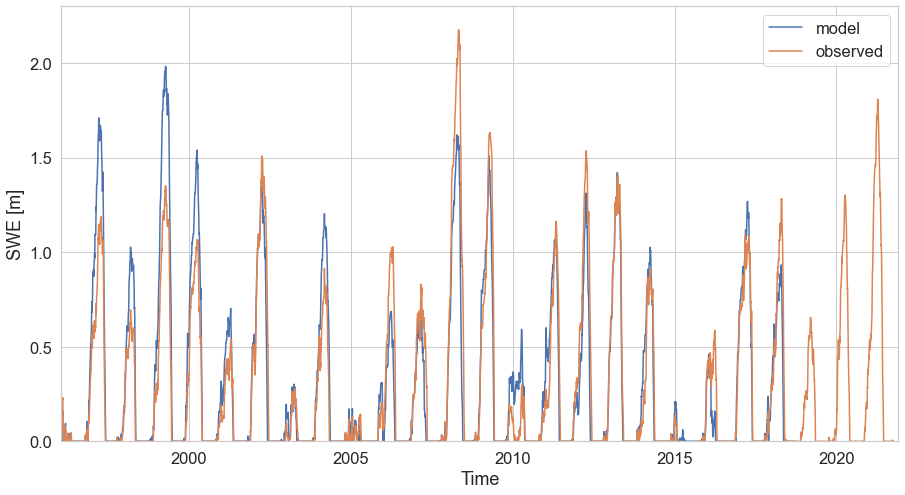

In [8]:
#plot modeled SWE vs. observed at Skookum Creek
sns.set_context("paper")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

ax = df_model_data_Skookum_prism_delta_05.plot(kind='line',  y = 'SWE_m', label = 'model', figsize=(15, 8))
df_snotel_Skookum.plot(kind='line',  y = 'SWE_m', label = 'observed', ax = ax)
#df_model_data_Skookum_67.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model 67 SWE', ax = ax)
#df_model_data_Skookum_53.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model 53 SWE', ax = ax)

ax.set_xlim([datetime(1996, 1, 21), datetime(2021, 12, 1)])
ax.set_ylim([0, 2.3])
plt.xlabel('Time')
plt.ylabel('SWE [m]')


Text(0, 0.5, 'SWE [m]')

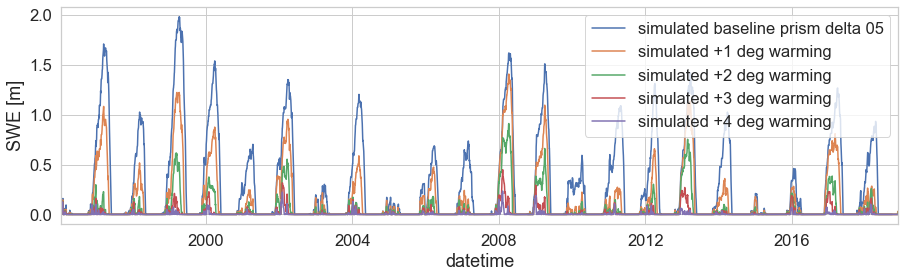

In [9]:
f, axes = plt.subplots(1, 1, figsize=(15, 4))
sns.set_theme(style='white', font_scale=1.5)
#fig.tight_layout(h_pad=5, w_pad=5)
#plt.subplots_adjust(hspace=0.2, wspace=0)
#sns.lineplot(x='time', y = 'SWE_m', label = 'observed', data = df_snotel_Skookum, ax=axes)
#sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated baseline', data = df_model_data_Skookum_99, ax=axes)
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated baseline prism delta 05', data = df_model_data_Skookum_prism_delta_05, ax=axes)
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +1 deg warming', data = df_model_data_Skookum_prism_delta_05_1deg, ax=axes)
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +2 deg warming', data = df_model_data_Skookum_prism_delta_05_2deg, ax=axes)

sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +3 deg warming', data = df_model_data_Skookum_prism_delta_05_3deg, ax=axes)
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +4 deg warming', data = df_model_data_Skookum_prism_delta_05_4deg, ax=axes)

axes.set_xlim([datetime(1996, 1, 21), datetime(2018, 12, 1)])
axes.set_ylabel('SWE [m]')
#axes.set_ylim([0, 500])

In [10]:
swe_model = df_model_data_Skookum_prism_delta_05.loc['1995-10-01':'2015-04-02']
swe_obs = df_snotel_Skookum.loc['1995-10-01':'2015-04-02']
#swe_obs = swe_obs.fillna(0)
#swe_model = swe_model.fillna(0)
#nse_swe = fc.nse(swe_model.swq, swe_obs.SWE_in)
nse_swe = mt.nse(swe_model.SWE_m.fillna(0), swe_obs.SWE_m.fillna(0))
print('NSE', nse_swe)

R_square = r2_score(swe_model.SWE_m, swe_obs.SWE_m)
print('R2', R_square)
kge_swe = mt.kge(swe_model.SWE_m.values, swe_obs.SWE_m.values)
rmse_swe = mt.rmse(swe_model.SWE_m.values, swe_obs.SWE_m.values)
print('KGE', kge_swe)
print('RMSE', rmse_swe)
#the lse metric is controversial
#lse_swe = mt.lse(swe_model.SWE_m.values, swe_obs.SWE_m.values)
pvse_swe = eff.PVSE_prime(swe_model.SWE_m.values, swe_obs.SWE_m.values)
#print('LSE', lse_swe)
print('PVSE', pvse_swe)
LBE_swe = eff.LBE(swe_model.SWE_m.values, swe_obs.SWE_m.values)
#LBEm_hat_swe = eff.LBEm(swe_model.swq.values, swe_obs.SWE_in.values)
#print('LBE hat', LBE_hat_swe)
#print('LBEm hat', LBEm_hat_swe)

NSE 0.8186312421028488
R2 0.8327565110234787
KGE 0.8810079426709273
RMSE 0.18279474819016214
PVSE 0.9243161887845024


In [11]:
#swe_model.swq
#flow_model_ = flow_model.loc['1995-10-01':'2015-04-02']
#flow_obs_ = flow_obs.loc['1995-10-01':'2015-04-02']
flow_model_ = flow_model_prism_delta_05.loc['1981-10-01':'2020-12-31']
flow_obs_ = flow_obs.loc['1981-10-01':'2020-12-31']
#swe_obs = swe_obs.fillna(0)
#swe_model = swe_model.fillna(0)
#nse_swe = fc.nse(swe_model.swq, swe_obs.SWE_in)
nse_flow = mt.nse(flow_model_.Q_cms, flow_obs_.Q_cms)
print('NSE', nse_flow)

R_square = r2_score(flow_model_.Q_cms.values, flow_obs_.Q_cms.values)
print('R2', R_square)
kge_flow = mt.kge(flow_model_.Q_cms.values, flow_obs_.Q_cms.values)
rmse_flow = mt.rmse(flow_model_.Q_cms.values, flow_obs_.Q_cms.values)
print('KGE', kge_flow)
print('RMSE', rmse_flow)
#lse_flow = mt.lse(flow_model_.Q_cms.values, flow_obs_.Q_cms.values)
pvse_flow = eff.PVSE_prime(flow_model_.Q_cms.values, flow_obs_.Q_cms.values)
#print('LSE', lse_swe)
print('PVSE', pvse_swe)
LBE_flow= eff.LBE(flow_model_.Q_cms.values, flow_obs_.Q_cms.values)
#LBEm_hat_flow = eff.LBEm(flow_model_.Q_cms.values, flow_obs_.Q_cms.values)
print('LBE', LBE_flow)
#print('LBE_hat', LBEm_hat_flow)
#print('LBEm hat', LBEm_hat_s


NSE 0.613046972001053
R2 0.29644059405111456
KGE 0.6301309130325972
RMSE 56.07702067822514
PVSE 0.9243161887845024
LBE 0.5815127824711551


Text(0, 0.5, 'SWE [in]')

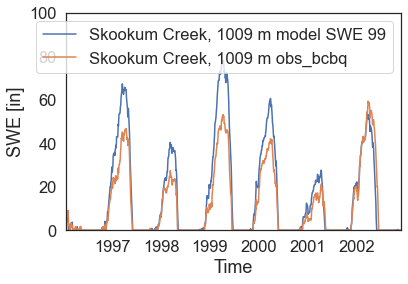

In [12]:
#plot modeled SWE vs. observed at Skookum Creek
ax = df_model_data_Skookum_prism_delta_05.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model SWE 99')
df_snotel_Skookum.plot(kind='line',  y = 'SWE_in', label = 'Skookum Creek, 1009 m obs_bcbq', ax = ax)
#df_model_data_Skookum_99.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model 99 SWE', ax = ax)
#df_model_data_Skookum_99.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model 99 SWE', ax = ax)

ax.set_xlim([datetime(1996, 1, 21), datetime(2002, 12, 1)])
ax.set_ylim([0, 100])
plt.xlabel('Time')
plt.ylabel('SWE [in]')

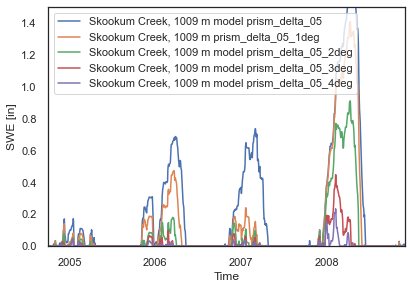

In [27]:
#plot SWE from different model runs - sensitivity to warming


ax = df_model_data_Skookum_prism_delta_05.plot(kind='line',  y = 'SWE_m', label = 'Skookum Creek, 1009 m model prism_delta_05')
df_model_data_Skookum_prism_delta_05_1deg.plot(kind='line',  y = 'SWE_m', label = 'Skookum Creek, 1009 m prism_delta_05_1deg', ax = ax)
df_model_data_Skookum_prism_delta_05_2deg.plot(kind='line',  y = 'SWE_m', label = 'Skookum Creek, 1009 m model prism_delta_05_2deg', ax = ax)
df_model_data_Skookum_prism_delta_05_3deg.plot(kind='line',  y = 'SWE_m', label = 'Skookum Creek, 1009 m model prism_delta_05_3deg', ax = ax)
df_model_data_Skookum_prism_delta_05_4deg.plot(kind='line',  y = 'SWE_m', label = 'Skookum Creek, 1009 m model prism_delta_05_4deg', ax = ax)

ax.set_xlim([datetime(2004, 10, 1), datetime(2008, 12, 1)])
ax.set_ylim([0, 1.5])
plt.xlabel('Time')
plt.ylabel('SWE [in]')
plt.show()

sns.move_legend(ax, "lower left", bbox_to_anchor=(.55, .45), frameon=False)
sns.set_context("paper")
sns.set(font_scale = 1)
sns.set_style("white")
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

(0.0, 900.0)

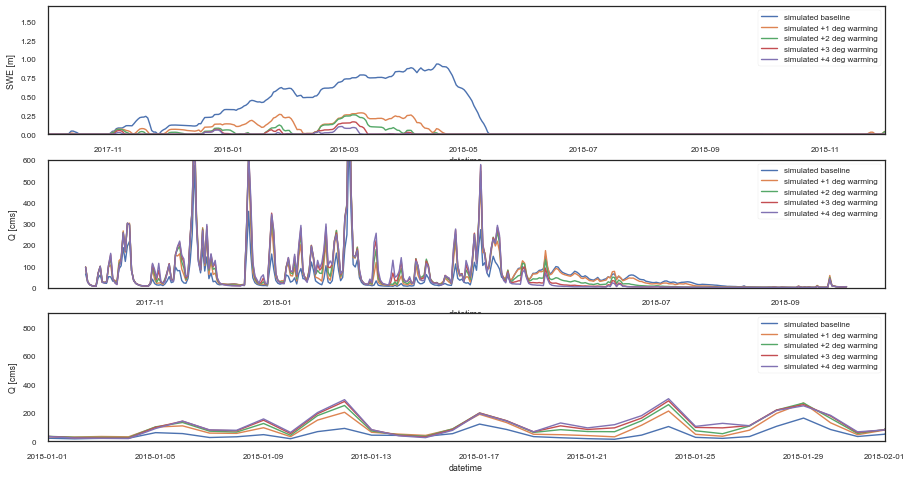

In [85]:
f, axes = plt.subplots(3, 1, figsize=(15, 8))

sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated baseline', data = df_model_data_Skookum_prism_delta_05, ax=axes[0])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +1 deg warming', data = df_model_data_Skookum_prism_delta_05_1deg, ax=axes[0])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +2 deg warming', data = df_model_data_Skookum_prism_delta_05_2deg, ax=axes[0])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +3 deg warming', data = df_model_data_Skookum_prism_delta_05_3deg, ax=axes[0])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +4 deg warming', data = df_model_data_Skookum_prism_delta_05_4deg, ax=axes[0])

axes[0].set_xlim([datetime(2017, 10, 1), datetime(2018, 12, 1)])
axes[0].set_ylim([0, 1.7])
axes[0].set_ylabel('SWE [m]')

wy = '2018'
#sns.lineplot(x='datetime', y = 'Q_cms', label = 'observed', data = flow_obs_by_wy.get_group('2008'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated baseline', data = flow_model_prism_delta_05_by_wy.get_group(wy), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +1 deg warming', data = flow_model_prism_delta_05_1deg_by_wy.get_group(wy), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +2 deg warming', data = flow_model_prism_delta_05_2deg_by_wy.get_group(wy), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +3 deg warming', data = flow_model_prism_delta_05_3deg_by_wy.get_group(wy), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +4 deg warming', data = flow_model_prism_delta_05_4deg_by_wy.get_group(wy), ax=axes[1])

axes[1].set_ylabel('Q [cms]')
axes[1].set_ylim([0, 600])

wy = '2018'
#sns.lineplot(x='datetime', y = 'Q_cms', label = 'observed', data = flow_obs_by_wy.get_group('2008'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated baseline', data = flow_model_prism_delta_05_by_wy.get_group(wy), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +1 deg warming', data = flow_model_prism_delta_05_1deg_by_wy.get_group(wy), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +2 deg warming', data = flow_model_prism_delta_05_2deg_by_wy.get_group(wy), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +3 deg warming', data = flow_model_prism_delta_05_3deg_by_wy.get_group(wy), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +4 deg warming', data = flow_model_prism_delta_05_4deg_by_wy.get_group(wy), ax=axes[2])

axes[2].set_xlim([datetime(2018, 1, 1), datetime(2018, 2, 1)])
axes[2].set_ylabel('Q [cms]')
axes[2].set_ylim([0, 900])

#plt.style.use('seaborn-paper')

In [34]:
gs

GridSpec(2, 1, height_ratios=[1, 2])

In [24]:
df_model_data_Skookum_prism_delta_05

,Unnamed: 0,prec_point,swq,tmean_point,tmax_point,tmin_point,prec_ref,swe,tmean_ref,tmax_ref,tmin_ref,SWE_m
datetime,,,,,,,,,,,,
1995-10-01,1995-10-01,0.020719,0.0,4.421611,9.72552,1.03194,0.2,0.0,5.966667,9.400000,3.105556,0.0
1995-10-02,1995-10-02,0.549274,0.0,4.747032,5.82604,3.70894,2.1,0.0,7.683333,9.972222,4.250000,0.0
1995-10-03,1995-10-03,0.349143,0.0,2.909119,5.26149,1.68102,1.6,0.0,3.677778,6.538889,2.533333,0.0
1995-10-04,1995-10-04,0.002496,0.0,3.588927,8.10677,1.18436,0.3,0.0,4.822222,9.972222,2.533333,0.0
1995-10-05,1995-10-05,0.035176,0.0,6.795381,10.34420,4.18884,0.0,0.0,8.255556,13.405556,5.394444,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-26,2018-09-26,0.000000,0.0,12.729382,18.86230,8.56804,0.0,0.0,12.833333,17.983333,9.972222,0.0
2018-09-27,2018-09-27,0.000000,0.0,13.166617,18.66910,10.01730,0.0,0.0,14.550000,19.127778,11.116667,0.0
2018-09-28,2018-09-28,0.000000,0.0,13.536317,20.43200,8.00648,0.0,0.0,15.122222,19.700000,12.261111,0.0


In [14]:
def plotSWE_P_T_Q_model(t, sP, sSWE, sT, sQ, tQm, sQm, time_period):
    fig = plt.figure()
    #gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 2, 1])

    # SWE plot
    ax = plt.subplot(gs[1])

    ax.plot(t, sSWE, color="r")
    # Create secondary axes
    ax2 = ax.twinx()
    c = 'black'
    ax2.bar(t, -sP, color = c)
    #plt.bar(x_pos, height, color=(0.2, 0.4, 0.6, 0.6))
    # fix the axis labels
    #convert P to mm/day

    max_pre = max(sP)

    #y2_ticks = np.linspace(0, max_pre, max_pre + 1)

    #y2_ticks = np.rint(y2_ticks)

    #y2_ticklabels = [str(i) for i in y2_ticks]

    #ax2.set_yticks(-1 * y2_ticks)
    #ax2.set_yticklabels(y2_ticklabels)

    ax.set_xlim(time_period)

    ax.set_ylabel('SWE[m]', color='k')

    ax2.set_ylabel('P[mm/day]', color='k')

    #ax.tick_params(axis='y', colors='k')
    #ax.xaxis.grid(visible=None, which='major', color='.7', linestyle='-')
    #ax.yaxis.grid(visible=None, which='major', color='.7', linestyle='-')
    ax.set_xlim(min(t), max(t))

    ax.set_ylim(0, 1.5)
    plt.grid(False)
    #ax.set_ylim(0, np.nanmax(sSWE)*1.2)
    ax.set_xlim(time_period)
    plt.setp(ax.get_xticklabels(), visible=False)
    # temperature plot

    ax2 = plt.subplot(gs[0])

    ax2.plot(t, sT)
    #ax2.xaxis.grid(visible=None, which='major', color='.7', linestyle='-')
    #ax2.yaxis.grid(visible=None, which='major', color='0.7', linestyle='-')
    ax2.set_ylabel('T [deg C]')
    ax2.set_xlim(min(t), max(t))
    plt.setp(ax2.get_xticklabels(), visible=False)
    ax2.set_xlim(time_period)

    ax2 = plt.subplot(gs[2])

    sQ_p = sQ.loc[t]
    sQm_p = sQm.loc[tQm]

    ax2.plot(t, sQ_p)
    ax2.plot(tQm, sQm_p)
    #ax2.xaxis.grid(visible=None, which='major', color='.9', linestyle='-')
    #ax2.yaxis.grid(visible=None, which='major', color='0.9', linestyle='-')
    ax2.set_ylabel('Q [cms])')
    ax2.set_ylim([0, 1000])
    ax2.set_xlim(min(t), max(t))
    ax2.set_xlabel('Time')
    ax2.tick_params(axis='x', labelrotation=45)
    ax2.legend(['observed', 'simulated'])


    plt.tight_layout()
    #ax2.invert_yaxis()
    plt.gcf().subplots_adjust(bottom=0.15)
    ax2.set_xlim(time_period)
    #ax3.set_xlim(time_period)
    #ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)
    #plt.style.use('seaborn-paper')

    plt.show()

    #plt.savefig(filename,format='pdf')
    plt.close(fig)


In [19]:
def plotSWE_P_T_Q_model_SWE_model(t, tswe_m, sP, sSWE, mSWE, sT, sQ, tQm, sQm, time_period):
    fig = plt.figure()
    #gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 2, 1])

    # SWE plot
    ax = plt.subplot(gs[1])

    ax.plot(t, sSWE, color="r")
    ax.plot(tswe_m, mSWE, color = 'k')
    # Create secondary axes
    ax2 = ax.twinx()
    c = 'black'
    ax2.bar(t, -sP, color = c)
    #plt.bar(x_pos, height, color=(0.2, 0.4, 0.6, 0.6))
    # fix the axis labels
    #convert P to mm/day

    max_pre = max(sP)

    #y2_ticks = np.linspace(0, max_pre, max_pre + 1)

    #y2_ticks = np.rint(y2_ticks)

    #y2_ticklabels = [str(i) for i in y2_ticks]

    #ax2.set_yticks(-1 * y2_ticks)
    #ax2.set_yticklabels(y2_ticklabels)

    ax.set_xlim(time_period)

    ax.set_ylabel('SWE[m]', color='k')

    ax2.set_ylabel('P[mm/day]', color='k')

    #ax.tick_params(axis='y', colors='k')
    #ax.xaxis.grid(visible=None, which='major', color='.7', linestyle='-')
    #ax.yaxis.grid(visible=None, which='major', color='.7', linestyle='-')
    ax.set_xlim(min(t), max(t))

    ax.set_ylim(0, 1.5)
    plt.grid(False)
    #ax.set_ylim(0, np.nanmax(sSWE)*1.2)
    ax.set_xlim(time_period)
    plt.setp(ax.get_xticklabels(), visible=False)
    # temperature plot

    ax2 = plt.subplot(gs[0])

    ax2.plot(t, sT)
    #ax2.xaxis.grid(visible=None, which='major', color='.7', linestyle='-')
    #ax2.yaxis.grid(visible=None, which='major', color='0.7', linestyle='-')
    ax2.set_ylabel('T [deg C]')
    ax2.set_xlim(min(t), max(t))
    plt.setp(ax2.get_xticklabels(), visible=False)
    ax2.set_xlim(time_period)

    ax2 = plt.subplot(gs[2])

    sQ_p = sQ.loc[t]
    sQm_p = sQm.loc[tQm]

    ax2.plot(t, sQ_p)
    ax2.plot(tQm, sQm_p)
    #ax2.xaxis.grid(visible=None, which='major', color='.9', linestyle='-')
    #ax2.yaxis.grid(visible=None, which='major', color='0.9', linestyle='-')
    ax2.set_ylabel('Q [cms])')
    ax2.set_ylim([0, 1000])
    ax2.set_xlim(min(t), max(t))
    ax2.set_xlabel('Time')
    ax2.tick_params(axis='x', labelrotation=45)
    ax2.legend(['observed', 'simulated'])


    plt.tight_layout()
    #ax2.invert_yaxis()
    plt.gcf().subplots_adjust(bottom=0.15)
    ax2.set_xlim(time_period)
    #ax3.set_xlim(time_period)
    #ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)
    #plt.style.use('seaborn-paper')

    plt.show()

    #plt.savefig(filename,format='pdf')
    plt.close(fig)


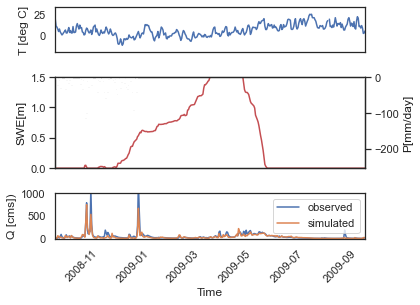

/var/folders/cj/b1yrjqfd1kj1xd6tryxsg1_r0000gn/T/ipykernel_60763/999463478.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


In [15]:
#time_period = [datetime(2011, 10, 1), datetime(2012, 10, 1)]
#time_period = [datetime(2006, 10, 1), datetime(2007, 10, 1)]

time_period = [datetime(2008, 10, 1), datetime(2009, 10, 1)]
plotSWE_P_T_Q_model(df_snotel_Skookum.index,
              df_snotel_Skookum.daily_P_in.fillna(0)*25.4,
              df_snotel_Skookum.SWE_m, df_snotel_Skookum.Tmean_C, flow_obs.Q_cms, flow_model_prism_delta_05.index, flow_model_prism_delta_05.Q_cms, time_period)
plt.style.use('seaborn-paper')
#ax.set_ylim(0, 2)
#ax.legend(['simulated', 'observed'])

#plotSWE_P_T_Q(df_snotel_Skookum.index,
#              df_snotel_Skookum.daily_P_in.fillna(0)*25.4,
#              df_snotel_Skookum.SWE_m, df_snotel_Skookum.Tmean_C, flow_obs.Q_cms, time_period)
#plt.style.use('seaborn-paper')
#ax.set_ylim(0, 2)

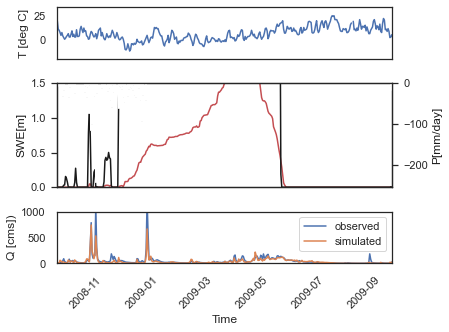

/var/folders/cj/b1yrjqfd1kj1xd6tryxsg1_r0000gn/T/ipykernel_60763/3233875697.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


In [28]:
time_period = [datetime(2008, 10, 1), datetime(2009, 10, 1)]
plotSWE_P_T_Q_model_SWE_model(df_snotel_Skookum.index,
                              df_model_data_Skookum_prism_delta_05.index,
                              df_snotel_Skookum.daily_P_in.fillna(0) * 25.4,
                              df_snotel_Skookum.SWE_m,
                              df_model_data_Skookum_prism_delta_05.swq,
                              df_snotel_Skookum.Tmean_C,
                              flow_obs.Q_cms,
                              flow_model_prism_delta_05.index,
                              flow_model_prism_delta_05.Q_cms,
                              time_period)
plt.style.use('seaborn-paper')



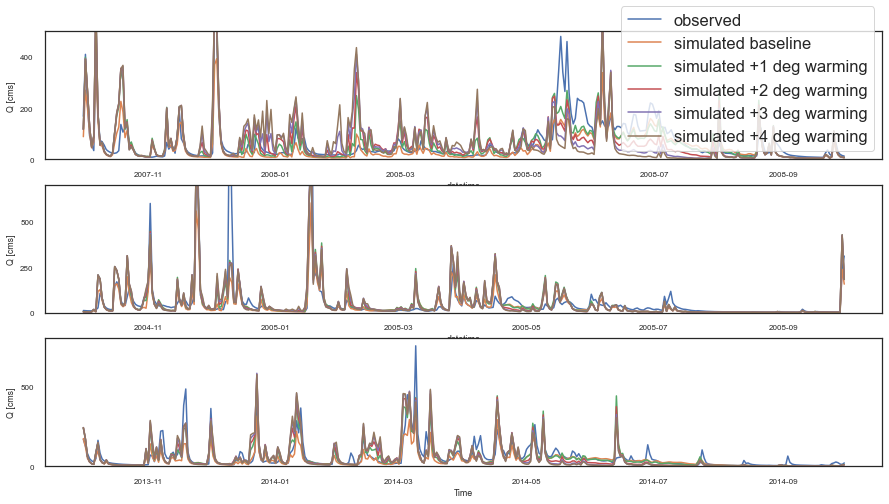

In [95]:
#plot three years
#select data neutral years

f, axes = plt.subplots(3, 1, figsize=(15, 8))
sns.set_theme(style='white', font_scale=1.5)
#fig.tight_layout(h_pad=5, w_pad=5)
plt.subplots_adjust(hspace=0.2, wspace=0)
sns.lineplot(x='datetime', y = 'Q_cms', label = 'observed', data = flow_obs_by_wy.get_group('2008'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated baseline', data = flow_model_prism_delta_05_by_wy.get_group('2008'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +1 deg warming', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2008'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +2 deg warming', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2008'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +3 deg warming', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2008'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +4 deg warming', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2008'), ax=axes[0])

axes[0].set_ylabel('Q [cms]')
axes[0].set_ylim([0, 500])

#axes[0].set_xlim([datetime(2019, 10, 1), datetime(2020, 9, 31)])

sns.lineplot(x='datetime', y = 'Q_cms',  data = flow_obs_by_wy.get_group('2005'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_by_wy.get_group('2005'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2005'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2005'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2005'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2005'), ax=axes[1])

plt.ylabel( "Q [cms]")
axes[1].set_ylabel('Q [cms]')
axes[1].set_ylim([0, 700])

sns.lineplot(x='datetime', y = 'Q_cms', data = flow_obs_by_wy.get_group('2014'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_by_wy.get_group('2014'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2014'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2014'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2014'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2014'), ax=axes[2])

# Set label for x-axis
axes[2].set_xlabel( "Time")
axes[2].set_ylabel('Q [cms]')
axes[2].set_ylim([0, 800])

plt.show()


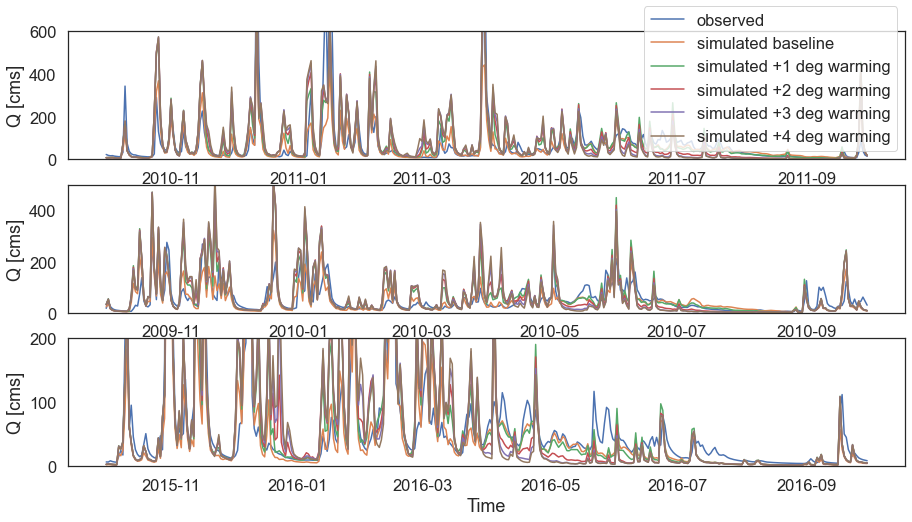

In [96]:
#plot three years
#select data warm years

f, axes = plt.subplots(3, 1, figsize=(15, 8))
sns.set_theme(style='white', font_scale=1.5)
#fig.tight_layout(h_pad=5, w_pad=5)
plt.subplots_adjust(hspace=0.2, wspace=0)
sns.lineplot(x='datetime', y = 'Q_cms', label = 'observed', data = flow_obs_by_wy.get_group('2011'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated baseline', data = flow_model_prism_delta_05_by_wy.get_group('2011'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +1 deg warming', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2011'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +2 deg warming', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2011'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +3 deg warming', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2011'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +4 deg warming', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2011'), ax=axes[0])



axes[0].set_ylabel('Q [cms]')
axes[0].set_ylim([0, 600])

#axes[0].set_xlim([datetime(2019, 10, 1), datetime(2020, 9, 31)])

sns.lineplot(x='datetime', y = 'Q_cms',  data = flow_obs_by_wy.get_group('2010'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_by_wy.get_group('2010'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2010'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2010'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2010'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2010'), ax=axes[1])

plt.ylabel( "Q [cms]")
axes[1].set_ylabel('Q [cms]')
axes[1].set_ylim([0, 500])

sns.lineplot(x='datetime', y = 'Q_cms', data = flow_obs_by_wy.get_group('2016'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_by_wy.get_group('2016'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2016'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2016'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2016'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2016'), ax=axes[2])

# Set label for x-axis
axes[2].set_xlabel( "Time")
axes[2].set_ylabel('Q [cms]')
axes[2].set_ylim([0, 200])

plt.show()

ValueError: day is out of range for month

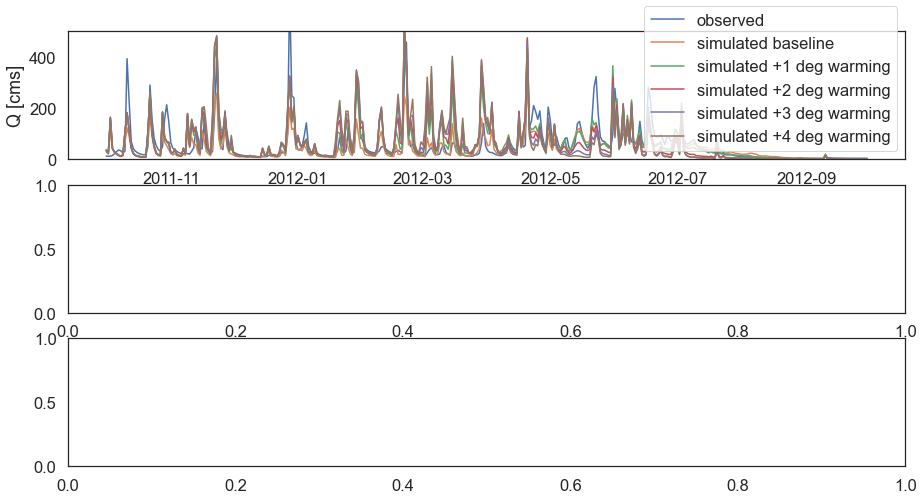

In [98]:
#plot three years
#select data cold years

f, axes = plt.subplots(3, 1, figsize=(15, 8))
sns.set_theme(style='white', font_scale=1.5)
#fig.tight_layout(h_pad=5, w_pad=5)
plt.subplots_adjust(hspace=0.2, wspace=0)
sns.lineplot(x='datetime', y = 'Q_cms', label = 'observed', data = flow_obs_by_wy.get_group('2012'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated baseline', data = flow_model_prism_delta_05_by_wy.get_group('2012'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +1 deg warming', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2012'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +2 deg warming', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2012'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +3 deg warming', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2012'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +4 deg warming', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2012'), ax=axes[0])

axes[0].set_ylabel('Q [cms]')
axes[0].set_ylim([0, 500])

axes[0].set_xlim([datetime(2011, 10, 1), datetime(2012, 9, 31)])

sns.lineplot(x='datetime', y = 'Q_cms',  data = flow_obs_by_wy.get_group('2011'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms',  data = flow_model_prism_delta_05_1deg_by_wy.get_group('2011'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2011'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2011'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2011'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2011'), ax=axes[1])

plt.ylabel( "Q [cms]")
axes[1].set_ylabel('Q [cms]')
axes[1].set_ylim([0, 600])

sns.lineplot(x='datetime', y = 'Q_cms', data = flow_obs_by_wy.get_group('2012'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05.get_group('2012'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2012'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2012'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2012'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2012'), ax=axes[2])


# Set label for x-axis
axes[2].set_xlabel( "Time")
axes[2].set_ylabel('Q [cms]')
axes[2].set_ylim([0, 200])

plt.show()

In [ ]:

time_period = [datetime(2008, 10, 1), datetime(2009, 9, 30)]

plotSWE_P_T_Q_model(df_snotel_Skookum.index,
                    df_snotel_Skookum.daily_P_in.fillna(0)*25.4,
                    df_snotel_Skookum.SWE_m, df_snotel_Skookum.Tmean_C, flow_obs.Q_cms, flow_model.index, flow_model.Q_cms, time_period)

#ax.set_ylim(0, 2)